## The contents include:

* 11. Fold changes in microarray data
* 12. The functional enrichment of data
* 13. Handling time series data
* 14. Clustering microarray data
* 15. Getting a co-expression network from microarray data
* 16. More visualizations for gene expression data



## 11. Fold changes in microarray data

Fold change refers to the ratio of final value to initial value. In terms of gene expression, it can be defined as the ratio of the final quantification of mRNA to the initial content. The initial and final stages can be the time points or treatment and control conditions. It represents the change rather than an ambiguous absolute quantity. It has been suggested that while extracting DE genes from a dataset, fold changes can serve as more reproducible identifiers. This recipe will explain the use of fold changes for such purposes.<br>
倍数变化是指最终值与初始值的比率。就基因表达而言,它可以定义为mRNA的最终定量与初始含量的比率。初始阶段和最终阶段可以是时间点或治疗和控制条件。它代表了变化而不是一个模棱两可的绝对数量。从数据集中提取DE基因的同时,认为倍数变化可以作为更可重复的标识符。这个部分将解释用于这种目的的倍数变化的使用。<br>

Required:<br>
1、The leukemia dataset.<br>
2、Directly use the results from the Finding the differentially expressed genes.<br>
3、The results only from the ALL type of leukemia.<br>
Fold changes are a part of tables that are derived from `limma`. Some other interesting operations on (or about) fold change are explained.

In [2]:
library(leukemiasEset)
data(leukemiasEset)
pheno <- pData(leukemiasEset)
mydata <- leukemiasEset[, sampleNames(leukemiasEset)[c(1:3, 13:15, 25:27, 49:51)]]
design <- model.matrix(~0 + factor(pData(mydata)$LeukemiaType))
colnames(design) <- unique(as.character(pData(mydata)$LeukemiaType))
design

,ALL,AML,CLL,NoL
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0
10,0,0,0,1


In [4]:
library(limma)
fit <- lmFit(mydata, design)
contrast.matrix <- makeContrasts(NoL- ALL, NoL- AML, NoL- CLL, levels = design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)
tested2 <- topTable(fit2,adjust="fdr",sort.by="B",number=Inf, coef=1)
DE2 <- tested2[tested2$adj.P.Val < 0.01,]

In [5]:
head(DE2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000152078,4.510507,4.856523,28.13988,4.463747e-11,9.004270e-07,14.01472
ENSG00000117519,-4.185175,4.791585,-22.73888,3.878292e-10,3.911645e-06,12.69738
ENSG00000145850,4.142236,4.507655,17.38636,5.759942e-09,2.925048e-05,10.72782
ENSG00000170180,5.681327,5.734169,17.37423,5.800214e-09,2.925048e-05,10.72231
ENSG00000087586,3.952183,5.720789,16.45393,9.977396e-09,3.111188e-05,10.28705
ENSG00000047597,5.362419,5.108415,16.32474,1.079114e-08,3.111188e-05,10.22315


In [6]:
## Extract the relevant columns into a separate data frame for the top 10,000 probes.
fit <- eBayes(fit)
myTable <- topTable(fit, number=10000)
logratio <- tested2$logFC

In [7]:
## The fold change to log values and vice versa by the `gtools` library.

library(gtools)

In [10]:
## Take a look at the heatmap and other plots produced for the samples to check for the batch effect. 
## In the filefolder, there are files called 'hm' and 'ma'.
library(hexbin)

In [8]:
LR <- foldchange2logratio(1, base=2)

FC <- logratio2foldchange(logratio, base=2)

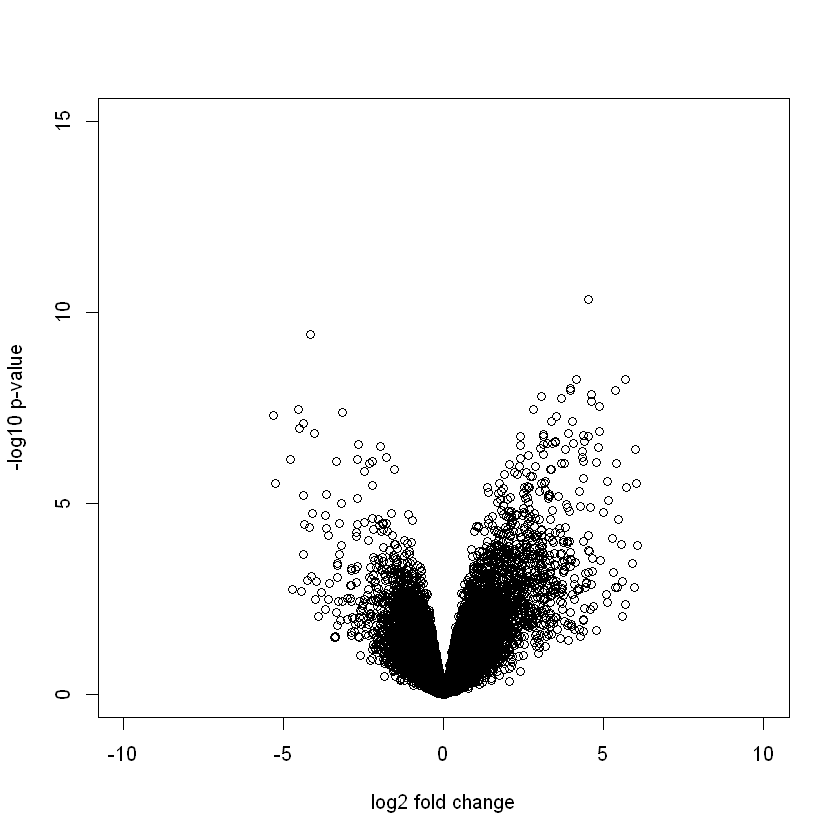

In [9]:
## visualize the log fold change and p-value relations in a volcano plot
plot(tested2$logFC, -log10(tested2$P.Value),xlim=c(-10, 10), 
     ylim=c(0, 15), xlab="log2 fold change", ylab="-log10 p-value")

In [10]:
## While selecting significant genes from the `limma` generated table, use the log fold change column 
## as another criterion to select DE genes in combination with the p-values.

myTable[tested2$P.Val < 0.05&tested2$logFC > 1.5,]

,ALL,AML,CLL,NoL,AveExpr,F,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000177954,14.48894,14.39784,14.61716,14.27750,14.44536,26127.989,1.456821e-20,1.430395e-16
ENSG00000142534,13.93954,13.75007,13.95506,13.72552,13.84255,23133.285,2.726058e-20,1.430395e-16
ENSG00000198637,14.13433,14.11080,14.23767,14.03697,14.12994,22955.645,2.836398e-20,1.430395e-16
ENSG00000133112,13.78061,13.78450,13.77267,13.56294,13.72518,20350.440,5.272850e-20,2.014582e-16
ENSG00000198034,13.51314,13.80660,13.71761,13.38727,13.60616,19851.026,5.992212e-20,2.014582e-16
ENSG00000140988,14.10058,14.14974,14.22823,14.07113,14.13742,16599.698,1.504609e-19,4.185933e-16
ENSG00000233927,13.32112,13.23596,13.42129,13.17491,13.28832,16016.015,1.808992e-19,4.185933e-16
ENSG00000166710,12.99352,13.13625,13.27690,13.31242,13.17977,15917.092,1.867608e-19,4.185933e-16
ENSG00000109475,14.08755,13.98899,14.11584,13.77873,13.99278,14880.393,2.641368e-19,4.813734e-16


The working of the preceding code is straightforward and self-explanatory. The log-fold changes are computed based on the final (treatment) and initial (control) values. The log used is to the base of 2. The volcano plot simply creates the plot of log fold change to log odds in the data. The plotting is a simple scatter plot with log fold changes along the x axis and –log(p-values) along the y axis. Transforming the p-values into a log scale gives better resolution for visualization.

## 12. The functional enrichment of data

We already know the DE gene from the array data. We can understand their role in biological function by analyzing the GO categories in the collection, so as to learn more about this group of genes at the biological level. This section is about the enrichment of the gene set with the GO term.<br>
我们已经从阵列数据中知道了DE基因，可以通过分析集合中的GO类别来了解它们在生物学功能方面的作用，从而在生物学层面更多地了解这组基因。这个部分是关于GO术语的基因集的富集。<br>

In this part, it requires the gene set data that comes from our analysis and the annotation package indicated in the `ExpressionSet` object (`hgu95av2.db`).<br>
The following steps is to describe the enrichment of genes with GO terms via a hypergeometric test.

In [12]:
library(hgu95av2.db)
library(GOstats)
library(biomaRt)

Prepare the input data from the results of the leukemia data analysis (Working with the data of multiple classes recipe). Create two sets, one that consists of all the genes in the data and the other that consists of DE genes.<br>
根据白血病数据分析的结果准备输入数据（Working with the data of multiple classes）。 创建两个数据集，一个由数据中的所有基因组成，另一个由差异表达基因组成。

In [13]:
# Working with the data of multiple classes 
library(leukemiasEset)
data(leukemiasEset)
pheno <- pData(leukemiasEset)
mydata <- leukemiasEset[, sampleNames(leukemiasEset)[c(1:3, 13:15, 25:27, 49:51)]]
design <- model.matrix(~0 + factor(pData(mydata)$LeukemiaType))
colnames(design) <- unique(as.character(pData(mydata)$LeukemiaType))
library(limma)
fit <- lmFit(mydata, design)
contrast.matrix <- makeContrasts(NoL- ALL, NoL- AML, NoL- CLL, levels = design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)
tested2 <- topTable(fit2,adjust="fdr",sort.by="B",number=Inf, coef=1)
DE2 <- tested2[tested2$adj.P.Val < 0.01,]

In [14]:
all_genes <- rownames(tested2)
head(all_genes)

[1] "ENSG00000152078" "ENSG00000117519" "ENSG00000145850" "ENSG00000170180"
[5] "ENSG00000087586" "ENSG00000047597"

In [15]:
sel_genes <- rownames(DE2)
head(sel_genes)

[1] "ENSG00000152078" "ENSG00000117519" "ENSG00000145850" "ENSG00000170180"
[5] "ENSG00000087586" "ENSG00000047597"

In [37]:
grep("entrez", listAttributes(mart)[,1])
listAttributes(mart)[c(59,79:81),]

,name,description,page
,<chr>,<chr>,<chr>
59,entrezgene_trans_name,EntrezGene transcript name ID,feature_page
79,entrezgene_description,NCBI gene description,feature_page
80,entrezgene_accession,NCBI gene accession,feature_page
81,entrezgene_id,NCBI gene ID,feature_page


In [38]:
## Map these sets to their Entrez IDs
# set the mart
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))

# get entrez ids for all genes
all_genes <- c(getBM(filters= "ensembl_gene_id", attributes=c("entrezgene_id"),
                     values= all_genes, mart= mart)) 

# get entrez ids for DE
sel_genes <- c(getBM(filters= "ensembl_gene_id", attributes=c("entrezgene_id"),
                     values= sel_genes, mart= mart)) 


Batch submitting query [=>-----------------------------]   5% eta:  8s

Batch submitting query [=>-----------------------------]   7% eta: 12s

Batch submitting query [==>----------------------------]  10% eta:  1m

Batch submitting query [===>---------------------------]  12% eta: 44s

Batch submitting query [====>--------------------------]  15% eta: 38s

Batch submitting query [====>--------------------------]  17% eta: 43s

Batch submitting query [=====>-------------------------]  20% eta: 38s

Batch submitting query [======>------------------------]  22% eta: 34s

Batch submitting query [=======>-----------------------]  24% eta: 31s

Batch submitting query [=======>-----------------------]  27% eta: 28s

Batch submitting query [========>----------------------]  29% eta: 26s

Batch submitting query [=========>---------------------]  32% eta: 24s

Batch submitting query [==========>--------------------]  34% eta: 22s

Batch submitting query [==========>--------------------]  37% e

In [39]:
## Define a cutoff for the test statistics
hgCutoff <- 0.05

In [40]:
## Use a `GOHyperGParams` object as an input parameter for the enrichment computations
params <- new("GOHyperGParams", geneIds = sel_genes, universeGeneIds = all_genes, 
              annotation = "hgu95av2.db", ontology = "BP", pvalueCutoff = hgCutoff, 
              conditional = FALSE, testDirection = "over")

Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"
Warning message in makeValidParams(.Object):
"converting univ from list to atomic vector via unlist"
Warning message in makeValidParams(.Object):
"removing duplicate IDs in universeGeneIds"


In [41]:
## Once having `GOHyperGParams` object, perform a hypergeometric test to get the p-value for the GO annotations
hgOver <- hyperGTest(params)
hgOver

Gene to GO BP  test for over-representation 
3220 GO BP ids tested (474 have p < 0.05)
Selected gene set size: 125 
    Gene universe size: 7795 
    Annotation package: hgu95av2 

In [42]:
## Check the summary of the object that was created
summary(hgOver)

GOBPID,Pvalue,OddsRatio,ExpCount,Count,Size,Term
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
GO:0006778,3.005083e-09,30.781297,0.40089801,8,25,porphyrin-containing compound metabolic process
GO:0006779,3.921996e-09,45.440678,0.27261065,7,17,porphyrin-containing compound biosynthetic process
GO:0033014,6.332814e-09,41.304314,0.28864657,7,18,tetrapyrrole biosynthetic process
GO:0042168,1.502025e-08,34.940678,0.32071841,7,20,heme metabolic process
GO:0006783,6.705291e-08,42.918768,0.24053881,6,15,heme biosynthetic process
GO:0033013,9.130584e-08,18.015915,0.59332906,8,37,tetrapyrrole metabolic process
GO:0046501,1.171639e-07,79.854167,0.14432328,5,9,protoporphyrinogen IX metabolic process
GO:0006782,2.125456e-06,84.484848,0.11225144,4,7,protoporphyrinogen IX biosynthetic process
GO:0019755,4.198163e-06,63.355372,0.12828736,4,8,one-carbon compound transport


In [43]:
## Get the number of genes associated with the different categories

head(geneCounts(hgOver))
head(universeCounts(hgOver))

GO:0006778 GO:0006779 GO:0033014 GO:0042168 GO:0006783 GO:0033013 
         8          7          7          7          6          8

GO:0006778 GO:0006779 GO:0033014 GO:0042168 GO:0006783 GO:0033013 
        25         17         18         20         15         37

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsLoading required package: grid


Attaching package: 'Rgraphviz'


The following objects are masked from 'package:IRanges':

    from, to


The following objects are masked from 'package:S4Vectors':

    from, to




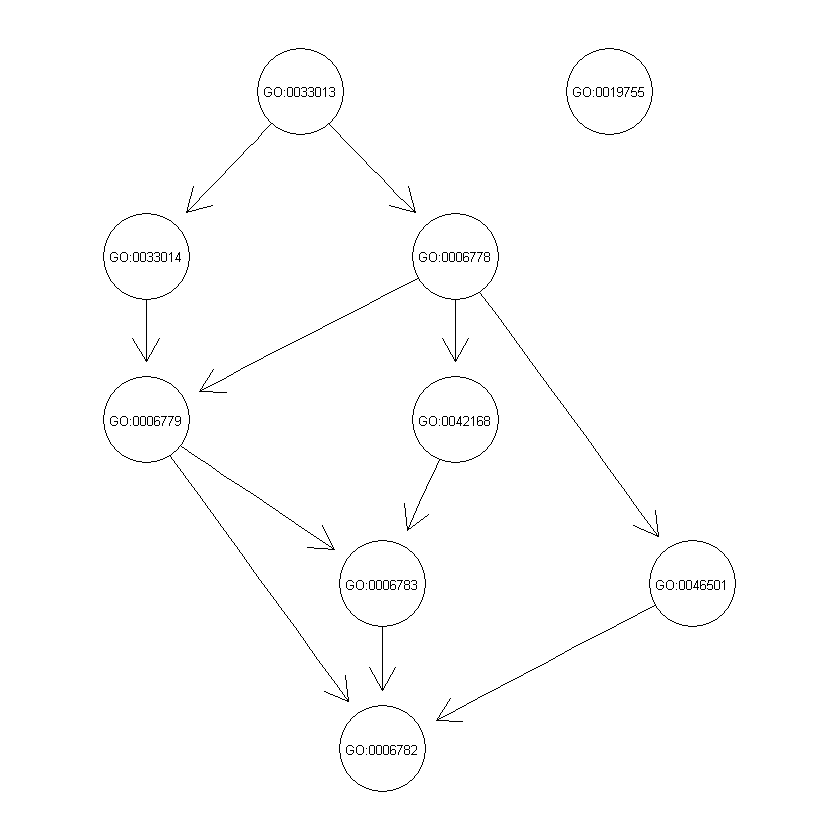

In [44]:
## Plot the GO directed acyclic graph (DAG). 绘制GO有向无环图（DAG）
## The plot is too much, so I just take some data of them to make a plot
library(Rgraphviz)    # `Rgraphviz` is used to show the DAG plot of GO enrichment
subhgOver <- subGraph(snodes=as.character(summary(hgOver)[1:9,1]), graph = goDag(hgOver))
plot(subhgOver)

In [45]:
## Generate the report as an HTML file that can be read using any browser.生成可以使用任何浏览器读取的HTML文件
htmlReport(hgOver, file="F:/ALL_hgco.html")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

## 13. Handling time series data

In fact, a cell sample is given a certain treatment, and its expression can change along the course of time. Consider that during stem cell or embryonic development, the expression of genes at different time points will vary. And handling such time course expression data, though not much different from the standard protocol described earlier, needs small modifications here.<br>
事实上，细胞样本被给予一定的处理，其表达会随着时间的推移而变化。考虑到在干细胞或胚胎发育期间，不同时间点的基因表达会有所不同。处理这样的时间过程表达数据虽然与前面描述的标准协议没有多大区别，但在这里需要很小的修改。

Required:<br>
1、We need time course data. Take the yeast (Saccharomyces cerevisae) dataset from the `Mfuzz` package as an example.们需要时间相关数据。以“Mfuzz”包中的酵母（酿酒酵母）数据集为例.
2、The installation of the `Mfuzz` package. 安装`Mfuzz`包。

In [47]:
BiocManager::install("Mfuzz")
library(Mfuzz)

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'Mfuzz'

also installing the dependencies 'widgetTools', 'DynDoc', 'e1071', 'tkWidgets'




package 'widgetTools' successfully unpacked and MD5 sums checked
package 'DynDoc' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'tkWidgets' successfully unpacked and MD5 sums checked
package 'Mfuzz' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpMnMXFB\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'FactoMineR', 'fansi', 'farver',
  'GetoptLong', 'ggridges', 'gplots', 'hms', 'knitr', 'leaps', 'multcomp',
  'mvtnorm', 'PMA', 'precrec', 'prettyunits', 'pROC', 'RCurl', 'RSQLite',
  'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun', 'XML', 'xts', 'zoo'

Loading required package: e1071


Attaching package: 'e1071'


The following object is masked from 'package:gtools':

    permutations



Attaching package: 'DynDoc'


The following object is masked from 'package:BiocGenerics':

    path




In [48]:
## As the dataset is `ExpressionSet`, which needs some other packages for direct handling 
## (the `affy` package needs the `AffyBatch` object), use the `affyPLM` library.
library(affy)
library(antiProfilesData)
library(affyPLM)

Loading required package: gcrma

Loading required package: preprocessCore



In [49]:
## load the datasets
data(yeast)

[1] "ExpressionSet"
attr(,"package")
[1] "Biobase"

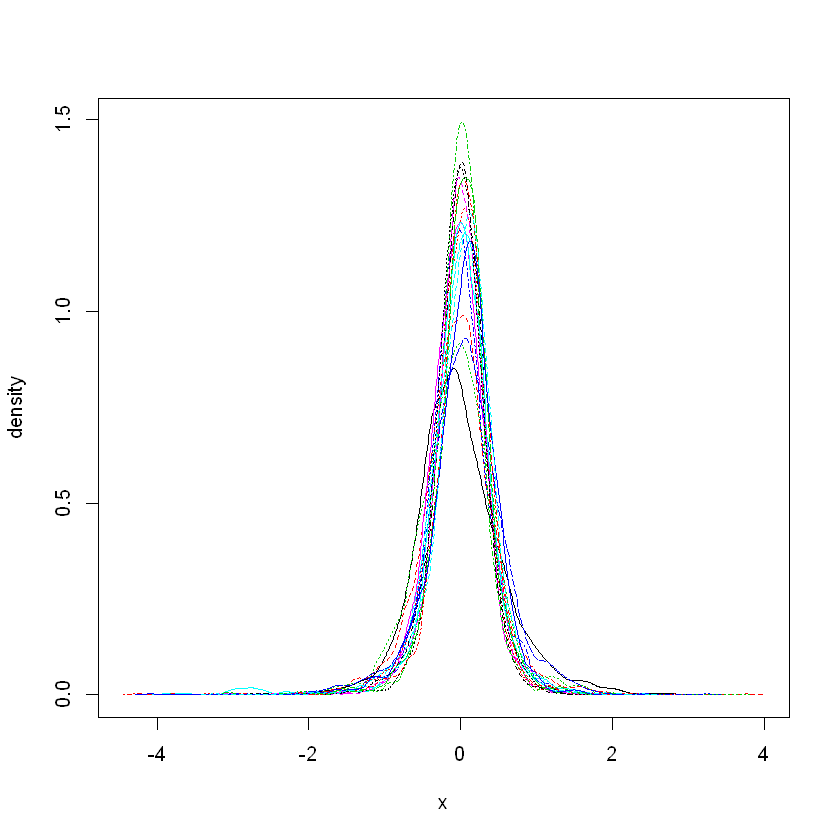

In [52]:
## Check the quality of the data using the density plots, boxplots, and so on.
class(yeast)


plotDensity(yeast)

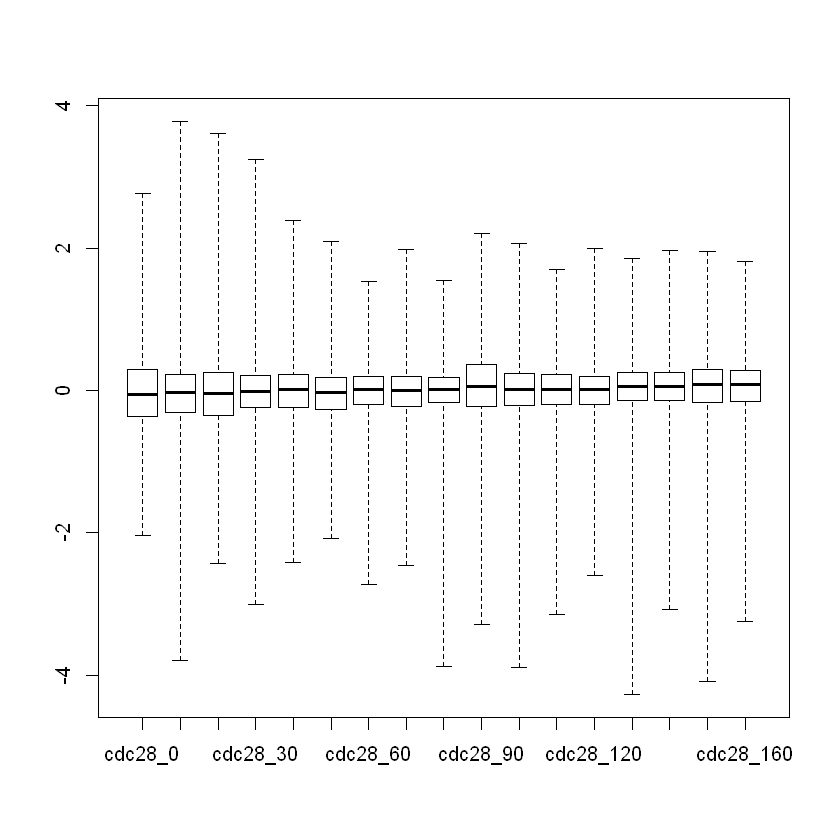

In [53]:
boxplot(yeast)

In [54]:
## To normalize the data, use `normalize.ExpressionSet.quantiles` from the `affyPLM` package
## (here, use `quantile` normalization).对数据进行标准化，使用`affyPLM`中的`normalize.ExpressionSet.quantiles`函数。

library(affy)
yeast_norm <- normalize.ExpressionSet.quantiles(yeast)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

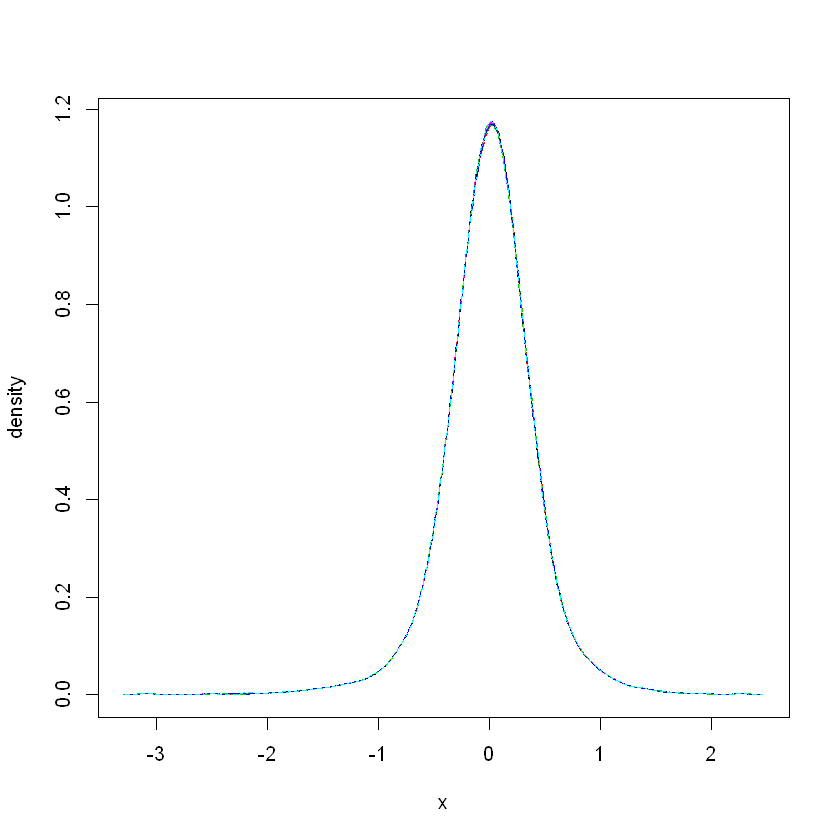

In [55]:
## Perform the quality assessment for the normalized data again.对标准化数据做质量评价。

plotDensity(yeast_norm)

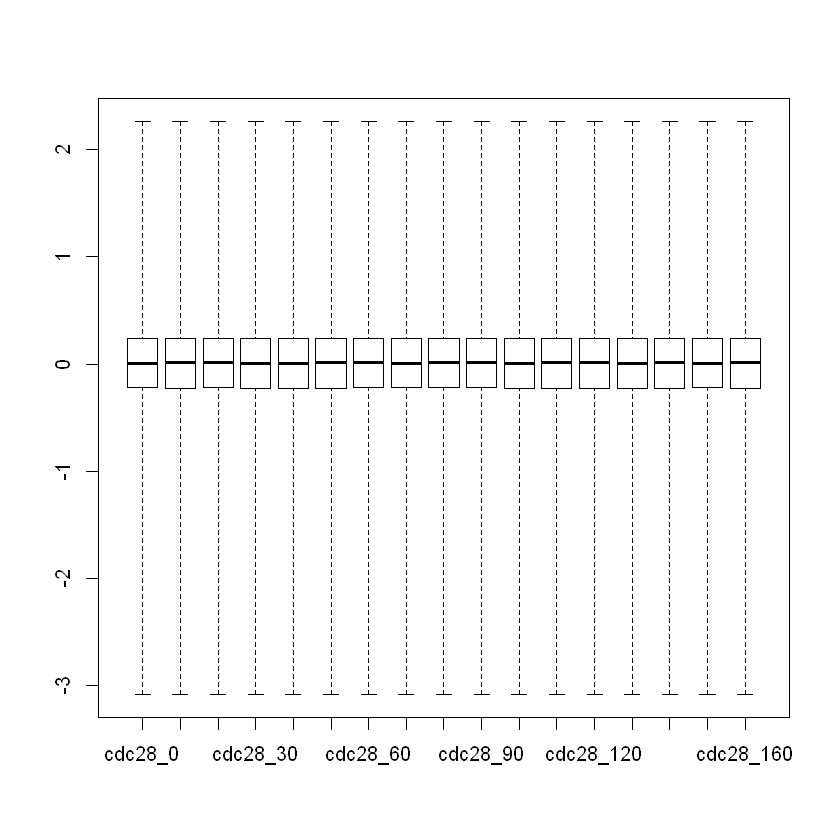

In [56]:
boxplot(yeast_norm)

In [57]:
## To check the attributes of the data, get the component details of the `ExpressionSet` object.
pData(yeast_norm) 
#有16个样本（从0点往后每隔10个单位直到160）

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,index,label,time
,<int>,<fct>,<dbl>
cdc28_0,0,cdc28_0,0
cdc28_10,1,cdc28_10,10
cdc28_20,2,cdc28_20,20
cdc28_30,3,cdc28_30,30
cdc28_40,4,cdc28_40,40
cdc28_50,5,cdc28_50,50
cdc28_60,6,cdc28_60,60
cdc28_70,7,cdc28_70,70
cdc28_80,8,cdc28_80,80


In [58]:
## The design matrix can accordingly be created for a time series where there will be controls and time points. 
## For example, if you have two replicates, C, for each control and time points, T1 and T2,

times <- pData(yeast_norm)$time
times <- as.factor(times)
times

[1] 0   10  20  30  40  50  60  70  80  90  100 110 120 130 140 150 160
Levels: 0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160

In [60]:
design <- model.matrix(~0 +factor(pData(yeast_norm)$time))
colnames(design)[1:17] <- c("C", paste("T", 1:16, sep=""))

In [61]:
## Create a contrast matrix using the `0th` point as a reference and all the other time points as the treatment
## (usually done for samples from the same culture)
cont <- makeContrasts(C-T1, C-T2, C-T3, C-T4, C-T5, C-T6, C-T7, C-T8, C-T9, C-T10,
                      C-T11, C-T12, C-T13, C-T14, C-T15, C-T16, levels=design)

In [62]:
## Use this matrix to fit the linear model, followed by the `eBayes` function to compute statistics

library(limma)
fit <- lmFit(yeast_norm, cont)
fitE <- eBayes(fit)

Warning message:
"Partial NA coefficients for 332 probe(s)"


In [63]:
## Filter the top-ranking genes using the `topTable` function.
x <- topTable(fitE, adjust="fdr", sort.by="F", number=100)
y <- x[x$adj.P.Val< 0.05,]
head(y)

,C...T1,C...T2,C...T3,C...T4,C...T5,C...T6,C...T7,C...T8,C...T9,C...T10,C...T11,C...T12,C...T13,C...T14,C...T15,C...T16,AveExpr,F,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YDR535C,0.045373350,-0.3547546,3.0812557,3.0812557,-0.9260739,0.4494472,-1.056314,-0.6702775,-1.5162388,-0.41473668,-0.9354636,-0.529467891,-1.0627284,0.5007095,0.96456085,-0.8230849,-0.0005090025,256.5624,2.244303e-05,0.02482905
YMR317W,-1.361618986,-0.6120542,0.1716029,-1.2922435,-1.2019479,-2.2924229,-1.580176,-0.8586329,-0.4953870,0.66528863,0.2092902,1.339882439,1.4571198,1.5013949,2.47249069,2.1328350,-0.0283052587,193.5176,4.037131e-05,0.02482905
YHR137W,0.085269790,0.9183755,1.1131313,0.9793744,1.6141288,1.9857307,1.291442,-0.2478004,-0.3620259,-0.72751145,-0.8521049,-0.705844221,-1.0954868,-1.5246807,-1.27434537,-1.1303175,0.0120720297,163.5566,5.728278e-05,0.02482905
YML047C,-0.459388638,-0.7911001,0.2786879,1.8677038,0.2557558,-0.6688607,1.407027,1.3683844,1.4283458,-0.43175983,-0.1842532,0.651554550,-1.3090766,-1.2034157,-1.33061493,-0.9217954,0.0045702974,153.9416,6.497142e-05,0.02482905
YMR032W,1.801686846,0.9413805,1.3044926,1.0622749,-0.4679252,-1.9259800,-2.229041,-1.4127112,-0.4110722,-0.02723012,0.7586565,1.155280123,-0.1675567,-1.0783823,-0.87879003,-0.7665813,0.0350770571,146.6830,7.183158e-05,0.02482905
YGL184C,-0.001825009,-0.2441705,-1.6977556,-1.9718563,-1.4590626,0.4270147,1.178113,1.3716358,0.7443744,0.94560458,0.9217415,0.007869278,0.1914265,0.3503931,0.01746599,-0.6565194,-0.0103381969,130.2669,9.191468e-05,0.02482905


## 14. Clustering microarray data

Clustering is about aggregating similar genes together in a group (called cluster) and away from other such groups. When genes get clustered together (falling in the same group/cluster), it means they follow a similar pattern based on the expression data under the given conditions. This section presents the widely used concept of hierarchical clustering in gene
expression analysis.<br>
聚类是关于将一组（称为聚类）中的相似基因聚集在一起并远离其他这样的聚类。当基因聚集在一起时（落在同一组/簇中），这意味着它们在给定条件下基于表达数据遵循类似的模式。本节内容介绍了基因表达分析中广泛使用的等级聚类的概念。<br>
Requires:<br>
1、The normalized breast cancer data from the earlier part. We use only part of it, the top 1500 genes—for a faster computation.<br>
2、`EMA` package.

In [65]:
## Create a dataset for clustering purposes from the leukemia data again. 
## Use only the first 100 data instances for demonstration purposes. 

library(affy)
library(affydata)
library(hgu133a2cdf)
mydata <- ReadAffy(celfile.path= "F:/GSE24460_RAW/")
# mydata <- ReadAffy(filenames="D:/Try-practice/Chapter 5/GSE24460_RAW/GSM602658_MCF71.CEL")
library(Biobase)
DIR <- system.file("extdata", package="Biobase")
exprsLoc <- file.path(DIR, "exprsData.txt") 
pDataLoc <- file.path(DIR, "pData.txt")
DIR
exprsLoc
pDataLoc
exprs <- as.matrix(read.csv(exprsLoc, header = TRUE, sep = "\t", row.names = 1, as.is = TRUE))
pData <- read.table(pDataLoc, row.names = 1, header = TRUE, sep = "\t")
pData <- new("AnnotatedDataFrame", data = pData)
exData <- new("MIAME", name="ABCabc", lab="XYZ Lab", contact="abc@xyz", title="", abstract="", url="www.xyz")
eset <- new("ExpressionSet", exprs = exprs, phenoData = pData, experimentData = exData, annotation = "hgu133a2")

[1] "D:/R-3.6.2/library/Biobase/extdata"

[1] "D:/R-3.6.2/library/Biobase/extdata/exprsData.txt"

[1] "D:/R-3.6.2/library/Biobase/extdata/pData.txt"

In [67]:
c.data <- exprs(eset[1:100,])
head(c.data)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
AFFX-MurIL2_at,192.7420,85.75330,176.7570,135.5750,64.49390,76.3569,160.5050,65.9631,56.9039,135.60800,...,179.8450,152.4670,180.83400,85.4146,157.98900,146.8000,93.8829,103.85500,64.4340,175.61500
AFFX-MurIL10_at,97.1370,126.19600,77.9216,93.3713,24.39860,85.5088,98.9086,81.6932,97.8015,90.48380,...,87.6806,108.0320,134.26300,91.4031,-8.68811,85.0212,79.2998,71.65520,64.2369,78.70680
AFFX-MurIL4_at,45.8192,8.83135,33.0632,28.7072,5.94492,28.2925,30.9694,14.7923,14.2399,34.48740,...,32.7911,33.5292,19.81720,20.4190,26.87200,31.1488,22.3420,19.01350,12.1686,17.37800
AFFX-MurFAS_at,22.5445,3.60093,14.6883,12.3397,36.86630,11.2568,23.0034,16.2134,12.0375,4.54978,...,15.9488,14.6753,-7.91911,12.8875,11.91860,12.8324,11.1390,7.55564,19.9849,8.96849
AFFX-BioB-5_at,96.7875,30.43800,46.1271,70.9319,56.17440,42.6756,86.5156,30.7927,19.7183,46.35200,...,58.6239,114.0620,93.44020,22.5168,48.64620,90.2215,42.0053,57.57380,44.8216,61.70440
AFFX-BioB-M_at,89.0730,25.84610,57.2033,69.9766,49.58220,26.1262,75.0083,42.3352,41.1207,91.53070,...,58.1331,104.1220,115.83100,58.1224,73.42210,64.6066,40.3068,41.82090,46.1087,49.41220


In [69]:
## Use `EMA` package to do an array clustering. 
## Simply use the `c.data` object with clustering from the `EMA` library to perform the clustering of arrays.
BiocManager::install("EMA")
library(EMA)
c.array <- clustering(data=c.data, metric="pearson", method="ward")
c.array

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'EMA'

also installing the dependencies 'siggenes', 'heatmap.plus'




package 'siggenes' successfully unpacked and MD5 sums checked
package 'heatmap.plus' successfully unpacked and MD5 sums checked
package 'EMA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpMnMXFB\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'FactoMineR', 'fansi', 'farver',
  'GetoptLong', 'ggridges', 'gplots', 'hms', 'knitr', 'leaps', 'multcomp',
  'mvtnorm', 'PMA', 'precrec', 'prettyunits', 'pROC', 'RCurl', 'RSQLite',
  'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun', 'XML', 'xts', 'zoo'




################################################################################


Easy Microarray Analysis


EMA stable version


Current release : v1.4.4 - march 2014


################################################################################



Attaching package: 'EMA'


The following object is masked from 'package:gtools':

    foldchange




Call:	 agnes(x = DIS, diss = TRUE, method = method, keep.diss = TRUE) 
Agglomerative coefficient:  0.9255212 
Order of objects:
 [1] A C M D J G O R U V Q T S X B E P Y F W I K H L N Z
Height (summary):
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001988 0.004644 0.007296 0.023240 0.020449 0.149199 

Available components:
[1] "order"     "height"    "ac"        "merge"     "diss"      "call"     
[7] "method"    "order.lab"

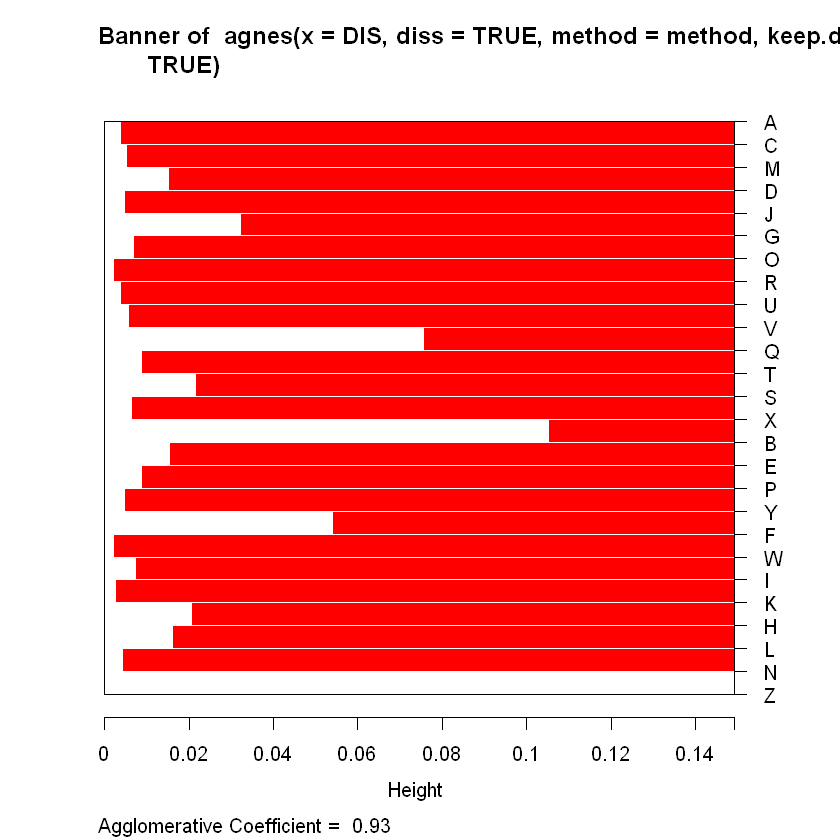

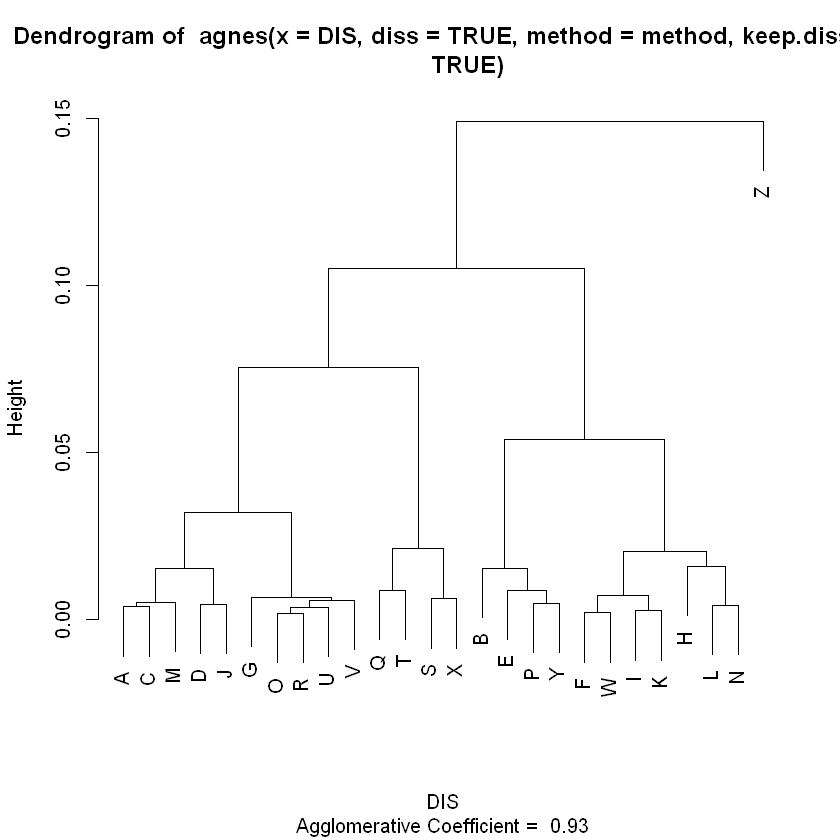

In [70]:
## Create the dendrogram plot for the cluster by plotting the clusters

plot(c.array)

In [71]:
## Simply transpose the data matrix and use it as input for the data argument in the clustering function, 
## and define the similarity metric and clustering method to cluster the gene

c.gene <- clustering(data=t(c.data), metric="pearsonabs", method="ward")
c.gene

Call:	 agnes(x = DIS, diss = TRUE, method = method, keep.diss = TRUE) 
Agglomerative coefficient:  0.8726019 
Order of objects:
  [1] AFFX-MurIL2_at              AFFX-YEL024w/RIP1_at       
  [3] AFFX-CreX-5_at              31312_at                   
  [5] AFFX-HSAC07/X00351_5_st     AFFX-YEL021w/URA3_at       
  [7] AFFX-LysX-5_at              AFFX-LysX-M_at             
  [9] AFFX-MurIL4_at              31321_at                   
 [11] 31328_at                    AFFX-CreX-3_st             
 [13] 31313_at                    AFFX-TrpnX-3_at            
 [15] 31335_at                    AFFX-PheX-M_at             
 [17] AFFX-HSAC07/X00351_3_at     31314_at                   
 [19] AFFX-BioB-5_at              AFFX-DapX-3_at             
 [21] AFFX-LysX-3_at              31331_at                   
 [23] AFFX-ThrX-M_at              31307_at                   
 [25] 31311_at                    AFFX-BioB-M_at             
 [27] AFFX-BioC-5_at              AFFX-BioB-3_st             
 [29

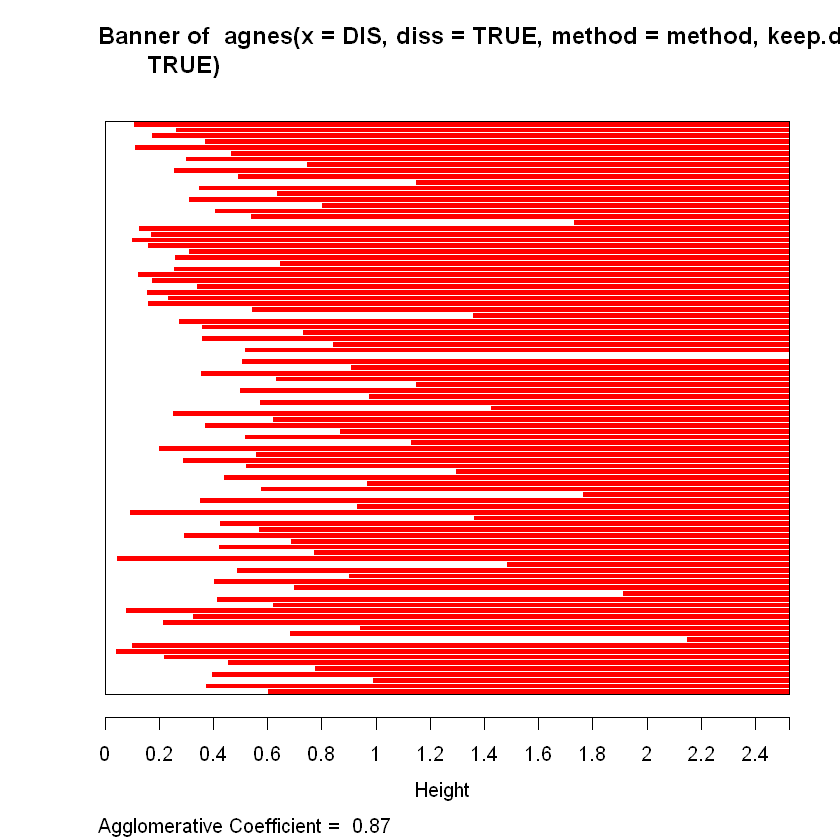

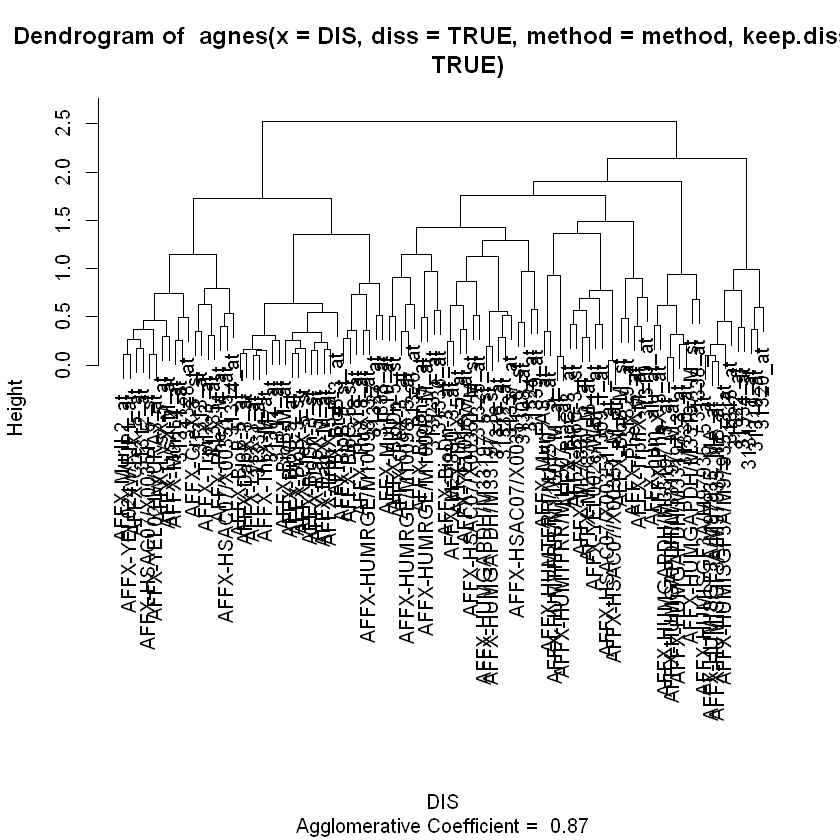

In [72]:
## Plot the results (note that for readability issues, the following screenshot shows the results for only 100 genes)

plot(c.gene)

## 15. Getting a co-expression network from microarray data

   Recently, biologists are prone to generate some interactive networks from gene expression data to represent the relations between the genes based on the data. There are many possible ways to plot these relationships from the data. <br>
   This section will explore the relations based on the correlation among the genes.<br>
   Requires:<br>
   1、A dataset().<br>
   2、`WGCNA` and `RBGL` packages.<br>


In [73]:
## The `eset` has annotation of `hgu133a2`

library(leukemiasEset)
data(leukemiasEset)
pheno <- pData(leukemiasEset)
mydata <- leukemiasEset[, sampleNames(leukemiasEset)[c(1:3, 13:15, 25:27, 49:51)]]
mydata
design <- model.matrix(~0 + factor(pData(mydata)$LeukemiaType))
colnames(design) <- unique(as.character(pData(mydata)$LeukemiaType))
library(limma)
fit <- lmFit(mydata, design)
contrast.matrix <- makeContrasts(NoL- ALL, NoL- AML, NoL- CLL, levels = design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)
tested2 <- topTable(fit2,adjust="fdr",sort.by="B",number=Inf, coef=1)
DE2 <- tested2[tested2$adj.P.Val < 0.01,]

ExpressionSet (storageMode: lockedEnvironment)
assayData: 20172 features, 12 samples 
  element names: exprs, se.exprs 
protocolData
  sampleNames: GSM330151.CEL GSM330153.CEL ... GSM331663.CEL (12 total)
  varLabels: ScanDate
  varMetadata: labelDescription
phenoData
  sampleNames: GSM330151.CEL GSM330153.CEL ... GSM331663.CEL (12 total)
  varLabels: Project Tissue ... Subtype (5 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: genemapperhgu133plus2 

In [75]:
library(affy)
library(affydata)
library(hgu133a2cdf)
mydata <- ReadAffy(celfile.path= "F:/GSE24460_RAW/")
# mydata <- ReadAffy(filenames="F:/GSE24460_RAW/GSM602658_MCF71.CEL")
library(Biobase)
DIR <- system.file("extdata", package="Biobase")
exprsLoc <- file.path(DIR, "exprsData.txt") 
pDataLoc <- file.path(DIR, "pData.txt")
DIR
exprsLoc
pDataLoc
exprs <- as.matrix(read.csv(exprsLoc, header = TRUE, sep = "\t", row.names = 1, as.is = TRUE))
pData <- read.table(pDataLoc, row.names = 1, header = TRUE, sep = "\t")
pData <- new("AnnotatedDataFrame", data = pData)
exData <- new("MIAME", name="ABCabc", lab="XYZ Lab", contact="abc@xyz", title="", abstract="", url="www.xyz")
eset <- new("ExpressionSet", exprs = exprs, phenoData = pData, experimentData = exData, annotation = "hgu133a2")
eset

[1] "D:/R-3.6.2/library/Biobase/extdata"

[1] "D:/R-3.6.2/library/Biobase/extdata/exprsData.txt"

[1] "D:/R-3.6.2/library/Biobase/extdata/pData.txt"

ExpressionSet (storageMode: lockedEnvironment)
assayData: 500 features, 26 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: A B ... Z (26 total)
  varLabels: gender type score
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu133a2 

In [76]:
BiocManager::install(c("WGCNA", "RBGL"))
library(WGCNA)
library(RBGL)

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'WGCNA', 'RBGL'

also installing the dependencies 'pcaPP', 'fit.models', 'rrcov', 'dynamicTreeCut', 'fastcluster', 'robust'




package 'pcaPP' successfully unpacked and MD5 sums checked
package 'fit.models' successfully unpacked and MD5 sums checked
package 'rrcov' successfully unpacked and MD5 sums checked
package 'dynamicTreeCut' successfully unpacked and MD5 sums checked
package 'fastcluster' successfully unpacked and MD5 sums checked
package 'robust' successfully unpacked and MD5 sums checked
package 'WGCNA' successfully unpacked and MD5 sums checked
package 'RBGL' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'RBGL'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\R-3.6.2\library\00LOCK\RBGL\libs\x64\RBGL.dll to D:\R-3.6.2\library\RBGL\libs\x64\RBGL.dll: Permission denied"
Warning message:
"restored 'RBGL'"



The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpMnMXFB\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'FactoMineR', 'fansi', 'farver',
  'GetoptLong', 'ggridges', 'gplots', 'hms', 'knitr', 'leaps', 'multcomp',
  'mvtnorm', 'PMA', 'precrec', 'prettyunits', 'pROC', 'RCurl', 'RSQLite',
  'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun', 'XML', 'xts', 'zoo'

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: 'fastcluster'


The following object is masked from 'package:stats':

    hclust



Attaching package: 'WGCNA'


The following object is masked from 'package:IRanges':

    cor


The following object is masked from 'package:S4Vectors':

    cor


The following object is masked from 'package:stats':

    cor



Attaching package: 'RBGL'


The following object is masked from 'package:e1071':

    extractPath




In [77]:
## Take the dataset, and use only significant genes at this stage to reduce the noise and simultaneously consume less time. 
## Only 50 genes have been used.

a <- rownames(DE2)[1:25]
a
eset[1:25, 1:3]

[1] "ENSG00000152078" "ENSG00000117519" "ENSG00000145850" "ENSG00000170180"
 [5] "ENSG00000087586" "ENSG00000047597" "ENSG00000175449" "ENSG00000104043"
 [9] "ENSG00000024526" "ENSG00000115641" "ENSG00000188672" "ENSG00000133063"
[13] "ENSG00000164330" "ENSG00000173372" "ENSG00000234955" "ENSG00000102935"
[17] "ENSG00000159189" "ENSG00000107562" "ENSG00000086506" "ENSG00000130635"
[21] "ENSG00000066923" "ENSG00000162692" "ENSG00000198336" "ENSG00000109501"
[25] "ENSG00000168497"

ExpressionSet (storageMode: lockedEnvironment)
assayData: 25 features, 3 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: A B C
  varLabels: gender type score
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu133a2 

In [78]:
myData_Sel <- exprs(eset[1:25, 1:3])
myData_Sel

,A,B,C
AFFX-MurIL2_at,192.7420,85.75330,176.7570
AFFX-MurIL10_at,97.1370,126.19600,77.9216
AFFX-MurIL4_at,45.8192,8.83135,33.0632
AFFX-MurFAS_at,22.5445,3.60093,14.6883
AFFX-BioB-5_at,96.7875,30.43800,46.1271
AFFX-BioB-M_at,89.0730,25.84610,57.2033
AFFX-BioB-3_at,265.9640,181.08000,164.9260
AFFX-BioC-5_at,110.1360,57.28890,67.3980
AFFX-BioC-3_at,43.0794,16.80060,37.6002
AFFX-BioDn-5_at,10.9187,16.17890,10.1495


In [79]:
## The data has sample names in the columns and genes in the rows. So transpose the data.

myData_Sel <- t(myData_Sel)
myData_Sel

,AFFX-MurIL2_at,AFFX-MurIL10_at,AFFX-MurIL4_at,AFFX-MurFAS_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,...,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,AFFX-hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at
A,192.7420,97.1370,45.81920,22.54450,96.7875,89.0730,265.964,110.1360,43.0794,10.9187,...,257.619,129.0560,61.7251,-40.9349,284.407,178.745,79.7368,9903.19,61.2671,120.5440
B,85.7533,126.1960,8.83135,3.60093,30.4380,25.8461,181.080,57.2889,16.8006,16.1789,...,113.690,74.6095,50.2372,-83.9302,208.099,101.300,55.5632,8501.62,37.4740,75.9854
C,176.7570,77.9216,33.06320,14.68830,46.1271,57.2033,164.926,67.3980,37.6002,10.1495,...,187.796,82.8271,61.6710,-28.7050,239.039,118.699,68.5976,9453.00,44.7525,126.3740


In [80]:
## Either run the correlation computation (it takes a lot of time) 
## or use the adjacency function from `WGCNA` to compute the adjacency matrix

myMat <- adjacency(myData_Sel, type="signed")
myMat
# The results give a square matrix of size equal to the number of genes. 
# Each entry in the matrix is the connectivity between the genes.

,AFFX-MurIL2_at,AFFX-MurIL10_at,AFFX-MurIL4_at,AFFX-MurFAS_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,...,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,AFFX-hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at
AFFX-MurIL2_at,1.000000e+00,1.455403e-07,9.373990e-01,8.837797e-01,4.928595e-01,7.954628e-01,0.171623608,0.444372324,9.946171e-01,1.907480e-11,...,8.156942e-01,0.4037651381,9.730722e-01,8.301657e-01,6.914793e-01,4.799091e-01,8.405878e-01,9.519479e-01,5.724229e-01,9.137639e-01
AFFX-MurIL10_at,1.455403e-07,1.000000e+00,6.079850e-06,1.892503e-05,1.308513e-03,6.990998e-05,0.018894884,0.001935609,4.917313e-07,8.819052e-01,...,5.371687e-05,0.0026759431,5.137398e-09,6.808438e-13,2.235073e-04,1.453855e-03,3.789065e-05,4.043552e-06,6.722836e-04,1.263022e-10
AFFX-MurIL4_at,9.373990e-01,6.079850e-06,1.000000e+00,9.906591e-01,7.130040e-01,9.514999e-01,0.326727380,0.663826782,9.678930e-01,2.172729e-08,...,9.622561e-01,0.6204134991,8.381323e-01,6.221678e-01,8.841767e-01,7.001490e-01,9.741780e-01,9.989593e-01,7.875276e-01,7.337988e-01
AFFX-MurFAS_at,8.837797e-01,1.892503e-05,9.906591e-01,1.000000e+00,7.914758e-01,9.842539e-01,0.400524968,0.745604017,9.257679e-01,1.380911e-07,...,9.902084e-01,0.7040544782,7.646807e-01,5.374527e-01,9.377028e-01,7.796149e-01,9.958063e-01,9.834561e-01,8.581795e-01,6.513910e-01
AFFX-BioB-5_at,4.928595e-01,1.308513e-03,7.130040e-01,7.914758e-01,1.000000e+00,8.805309e-01,0.806449161,0.996688741,5.564141e-01,7.140448e-05,...,8.631531e-01,0.9885134748,3.588041e-01,1.878861e-01,9.490007e-01,9.997686e-01,8.395418e-01,6.856132e-01,9.916117e-01,2.639864e-01
AFFX-BioB-M_at,7.954628e-01,6.990998e-05,9.514999e-01,9.842539e-01,8.805309e-01,1.000000e+00,0.505217865,0.842040128,8.492020e-01,1.041157e-06,...,9.992835e-01,0.8056096836,6.590401e-01,4.306478e-01,9.838835e-01,8.707699e-01,9.962696e-01,9.368935e-01,9.324057e-01,5.413067e-01
AFFX-BioB-3_at,1.716236e-01,1.889488e-02,3.267274e-01,4.005250e-01,8.064492e-01,5.052179e-01,1.000000000,0.848199089,2.102798e-01,2.694197e-03,...,4.823420e-01,0.8812318972,1.030196e-01,3.828800e-02,6.163032e-01,8.178186e-01,4.534161e-01,3.037795e-01,7.336065e-01,6.404777e-02
AFFX-BioC-5_at,4.443723e-01,1.935609e-03,6.638268e-01,7.456040e-01,9.966887e-01,8.420401e-01,0.848199089,1.000000000,5.064631e-01,1.227810e-04,...,8.228123e-01,0.9975150007,3.164124e-01,1.594107e-01,9.211746e-01,9.982059e-01,7.970447e-01,6.357969e-01,9.779256e-01,2.283942e-01
AFFX-BioC-3_at,9.946171e-01,4.917313e-07,9.678930e-01,9.257679e-01,5.564141e-01,8.492020e-01,0.210279772,0.506463052,1.000000e+00,2.336069e-10,...,8.672758e-01,0.4640452053,9.445672e-01,7.744525e-01,7.527638e-01,5.431469e-01,8.891232e-01,9.782344e-01,6.367208e-01,8.693896e-01
AFFX-BioDn-5_at,1.907480e-11,8.819052e-01,2.172729e-08,1.380911e-07,7.140448e-05,1.041157e-06,0.002694197,0.000122781,2.336069e-10,1.000000e+00,...,6.984189e-07,0.0001916592,2.521861e-15,1.304229e-16,5.811910e-06,8.264866e-05,4.090860e-07,1.089949e-08,2.810378e-05,1.324426e-27


In [81]:
## The values in the resulting adjacency matrix can be set to either 0 (edge absent) 
## or 1 (edge present) via dichotomization in different ways to get the final adjacency matrix. 
## Simply use a threshold of 0.90 (a high value to get the most correlated vertices), 
## as one of the simplest methods, but not the optimal one
adjMat <- myMat
adjMat[abs(adjMat)>0.90] <- 1
adjMat[abs(adjMat)<=0.90] <- 0
diag(adjMat) <- 0

A graphNEL graph with undirected edges
Number of Nodes = 25 
Number of Edges = 86 

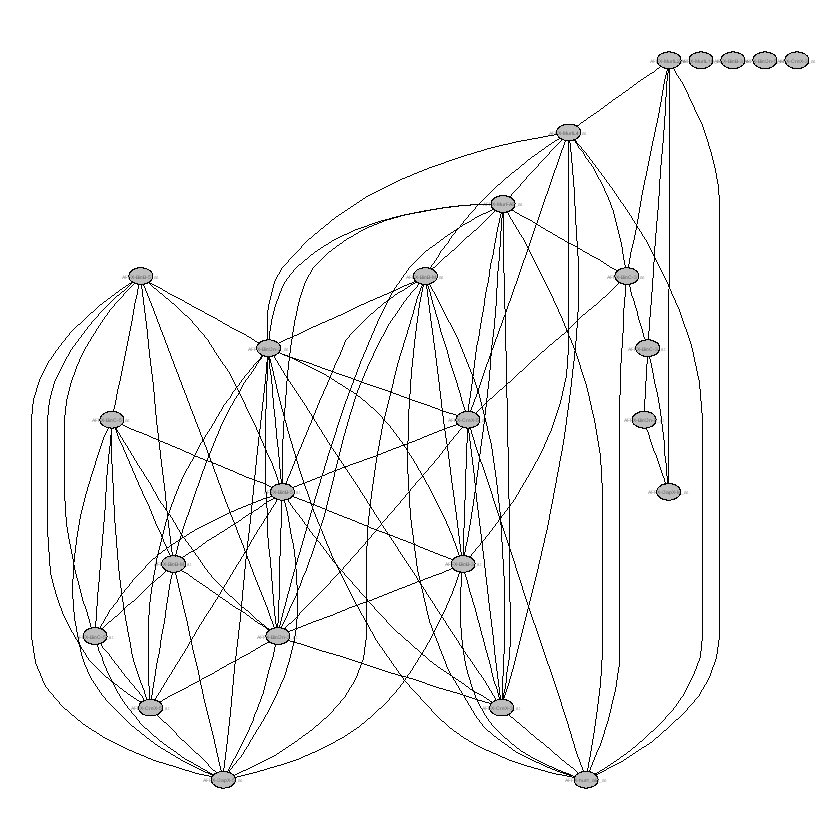

In [82]:
## The final adjacency matrix can be converted into a `graphNEL` object to be rendered as a graph with nodes and edges
## (note that plotting the graph might take some time depending on the network size)
myGraph <- as(adjMat, "graphNEL")
myGraph
plot(myGraph, nodeAttrs=makeNodeAttrs(myGraph,fontsize=28, fillcolor="grey"))

The method in this part is based on the computation of the relationship between the genes in terms of correlation or similarity measures. The function computes the pairwise similarity or correlation among the genes based on the expression data and returns this as a matrix. The threshold set defines only highly correlated or similar genes connected by an edge in the network otherwise no connection between the genes. This adjacency matrix is then
used to get the graph object.

## 16. More visualizations for gene expression data

   In this part, there will be some interesting and useful visualizations for expression data. The visualizations or plots shown are heatmaps, Venn diagrams, and volcano plots.<br>
   Followed by the `Clustering microarray data` section.

In [85]:
library(affy)
library(affydata)
library(hgu133a2cdf)
library(EMA)
# mydata <- ReadAffy(celfile.path= "D:/Try-practice/Chapter 5/GSE24460_RAW/")
mydata <- ReadAffy(filenames="F:/GSE24460_RAW/GSM602658_MCF71.CEL")
library(Biobase)
DIR <- system.file("extdata", package="Biobase")
exprsLoc <- file.path(DIR, "exprsData.txt") 
pDataLoc <- file.path(DIR, "pData.txt")
DIR
exprsLoc
pDataLoc
exprs <- as.matrix(read.csv(exprsLoc, header = TRUE, sep = "\t", row.names = 1, as.is = TRUE))
pData <- read.table(pDataLoc, row.names = 1, header = TRUE, sep = "\t")
pData <- new("AnnotatedDataFrame", data = pData)
exData <- new("MIAME", name="ABCabc", lab="XYZ Lab", contact="abc@xyz", title="", abstract="", url="www.xyz")
eset <- new("ExpressionSet", exprs = exprs, phenoData = pData, experimentData = exData, annotation = "hgu133a2")
c.data <- exprs(eset[1:50,])
head(c.data)
c.array <- clustering(data=c.data, metric="pearson", method="ward")
c.array
c.gene <- clustering(data=t(c.data), metric="pearsonabs", method="ward")
c.gene

[1] "D:/R-3.6.2/library/Biobase/extdata"

[1] "D:/R-3.6.2/library/Biobase/extdata/exprsData.txt"

[1] "D:/R-3.6.2/library/Biobase/extdata/pData.txt"

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
AFFX-MurIL2_at,192.7420,85.75330,176.7570,135.5750,64.49390,76.3569,160.5050,65.9631,56.9039,135.60800,...,179.8450,152.4670,180.83400,85.4146,157.98900,146.8000,93.8829,103.85500,64.4340,175.61500
AFFX-MurIL10_at,97.1370,126.19600,77.9216,93.3713,24.39860,85.5088,98.9086,81.6932,97.8015,90.48380,...,87.6806,108.0320,134.26300,91.4031,-8.68811,85.0212,79.2998,71.65520,64.2369,78.70680
AFFX-MurIL4_at,45.8192,8.83135,33.0632,28.7072,5.94492,28.2925,30.9694,14.7923,14.2399,34.48740,...,32.7911,33.5292,19.81720,20.4190,26.87200,31.1488,22.3420,19.01350,12.1686,17.37800
AFFX-MurFAS_at,22.5445,3.60093,14.6883,12.3397,36.86630,11.2568,23.0034,16.2134,12.0375,4.54978,...,15.9488,14.6753,-7.91911,12.8875,11.91860,12.8324,11.1390,7.55564,19.9849,8.96849
AFFX-BioB-5_at,96.7875,30.43800,46.1271,70.9319,56.17440,42.6756,86.5156,30.7927,19.7183,46.35200,...,58.6239,114.0620,93.44020,22.5168,48.64620,90.2215,42.0053,57.57380,44.8216,61.70440
AFFX-BioB-M_at,89.0730,25.84610,57.2033,69.9766,49.58220,26.1262,75.0083,42.3352,41.1207,91.53070,...,58.1331,104.1220,115.83100,58.1224,73.42210,64.6066,40.3068,41.82090,46.1087,49.41220


Call:	 agnes(x = DIS, diss = TRUE, method = method, keep.diss = TRUE) 
Agglomerative coefficient:  0.9367669 
Order of objects:
 [1] A C U M E T G O V R D J S X Q B P Y F K W I H L N Z
Height (summary):
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0004355 0.0016153 0.0047194 0.0204141 0.0160734 0.1565105 

Available components:
[1] "order"     "height"    "ac"        "merge"     "diss"      "call"     
[7] "method"    "order.lab"

Call:	 agnes(x = DIS, diss = TRUE, method = method, keep.diss = TRUE) 
Agglomerative coefficient:  0.8619217 
Order of objects:
 [1] AFFX-MurIL2_at              AFFX-CreX-5_at             
 [3] AFFX-PheX-M_at              AFFX-MurIL4_at             
 [5] AFFX-BioDn-3_at             AFFX-CreX-3_st             
 [7] AFFX-LysX-5_at              AFFX-LysX-M_at             
 [9] AFFX-BioB-M_st              AFFX-BioB-5_at             
[11] AFFX-DapX-3_at              AFFX-ThrX-M_at             
[13] AFFX-BioC-5_at              AFFX-BioB-3_st             
[15] AFFX-CreX-5_st              AFFX-LysX-3_at             
[17] AFFX-BioB-M_at              AFFX-BioDn-3_st            
[19] AFFX-DapX-5_at              AFFX-DapX-M_at             
[21] AFFX-TrpnX-5_at             AFFX-BioB-3_at             
[23] AFFX-PheX-5_at              AFFX-ThrX-5_at             
[25] AFFX-TrpnX-M_at             AFFX-TrpnX-3_at            
[27] AFFX-BioB-5_st              AFFX-BioC-5_st             
[29] AFFX-ThrX-3_a

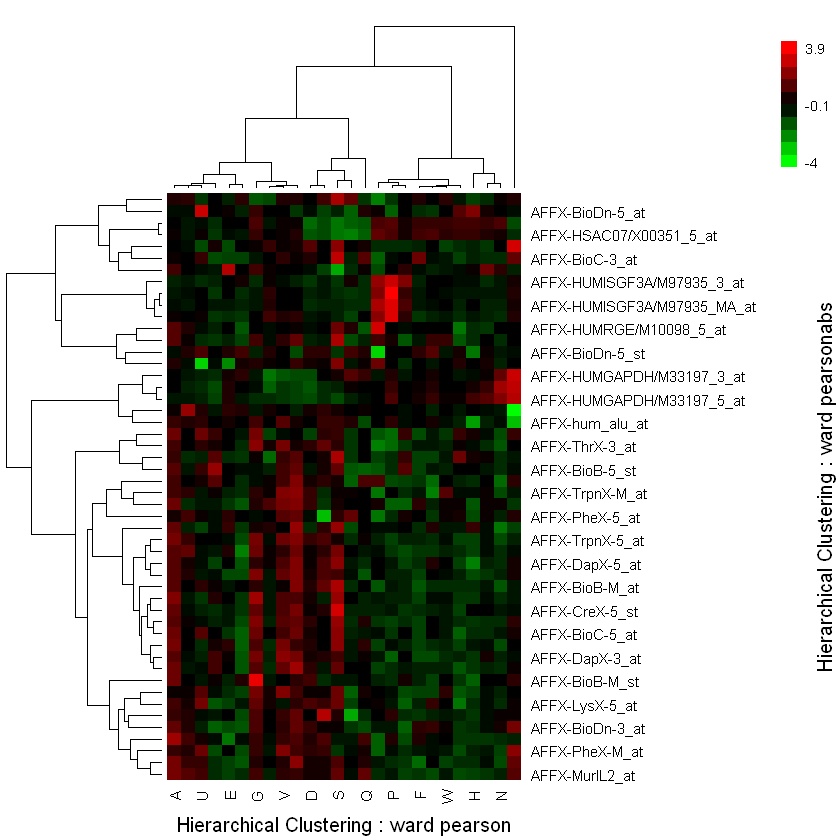

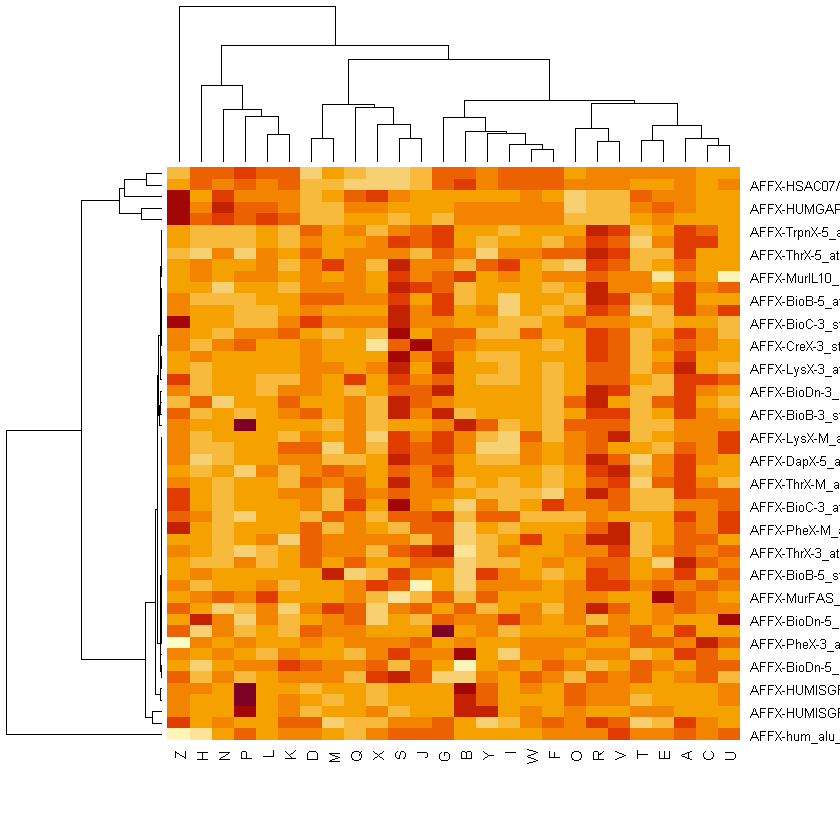

In [86]:
## To do a heatmap, use the `clustering.plot` function of the `EMA` library and 
## pass the previously mentioned clusters as an argument.
clustering.plot(tree=c.array, tree.sup=c.gene, data=c.data)
# This generates the required heatmap.
# But `heatmap` can do the same
heatmap(c.data)
# The following figure shows a heatmap for selected genes from the leukemiaexpression data, 
# which features normal cells and the different types of leukemia.

In [87]:
## The followning is a Venn diagram.
## It can be used to show the common and unique contents of two variables. 
## This will require the following VennDiagram library.
BiocManager::install("VennDiagram")
library(VennDiagram)

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'VennDiagram'



package 'VennDiagram' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpMnMXFB\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'FactoMineR', 'fansi', 'farver',
  'GetoptLong', 'ggridges', 'gplots', 'hms', 'knitr', 'leaps', 'multcomp',
  'mvtnorm', 'PMA', 'precrec', 'prettyunits', 'pROC', 'RCurl', 'RSQLite',
  'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun', 'XML', 'xts', 'zoo'

Loading required package: futile.logger


Attaching package: 'futile.logger'


The following object is masked from 'package:gtools':

    scat




In [90]:
## Create artificial data that consists of five variables (as sets) as a named list object.
set <- list()
for(i in 1:5){
    set[[i]]=sample(LETTERS[1:20], replace=TRUE, prob=rep(0.05,20))
}
names(set)=c(paste("S", 1:5, sep=""))
set

$S1
 [1] "I" "T" "L" "K" "R" "O" "C" "N" "K" "N" "G" "A" "Q" "R" "H" "Q" "I" "I" "T"
[20] "C"

$S2
 [1] "M" "D" "B" "R" "P" "F" "R" "I" "L" "O" "J" "I" "Q" "R" "E" "F" "T" "G" "D"
[20] "K"

$S3
 [1] "P" "G" "O" "P" "Q" "O" "C" "E" "O" "M" "L" "G" "K" "A" "R" "G" "M" "C" "L"
[20] "T"

$S4
 [1] "D" "F" "I" "N" "T" "R" "N" "S" "D" "A" "M" "Q" "A" "B" "R" "A" "R" "K" "A"
[20] "D"

$S5
 [1] "M" "P" "O" "P" "B" "H" "J" "O" "K" "I" "A" "S" "I" "C" "T" "I" "L" "P" "J"
[20] "N"

In [91]:
## To plot the Venn diagram, use the five sets created in the list set and create the `gList` object.
venn.plot <- venn.diagram(x = set, filename = NULL, cat.cex = 1.5, alpha = 0.50, col = "black",
                          fill = c("dodgerblue","goldenrod1", "darkorange1", "seagreen3", "orchid3"),
                          cex= c(1.5, 1.5, 1.5, 1.5, 1.5, 1, 0.8, 1, 0.8, 1, 0.8, 1, 0.8, 1, 0.8,
                                 1, 0.55, 1, 0.55, 1, 0.55, 1, 0.55, 1, 0.55, 1, 1, 1, 1, 1, 1.5),
                          cat.col = c("dodgerblue", "goldenrod1", "darkorange1","seagreen3", "orchid3"),
                          cat.fontface = "bold", margin = 0.05)

In [92]:
## Create the plot onto a PDF file using the `grid.draw` function. 
pdf("F:/venn.pdf")
grid.draw(venn.plot)
dev.off()

png 
  2

In [93]:
## The volcano plots are used to plot the fold changes and p-values against each other. 
## Here to deal with a more intuitive representation of the volcano plot using the `ggplot2` library.
## Then select the top-ranked genes from the `limma` analysis as a data frame.
library(ggplot2)
library(leukemiasEset)
data(leukemiasEset)
pheno <- pData(leukemiasEset)
mydata <- leukemiasEset[, sampleNames(leukemiasEset)[c(1:3, 13:15, 25:27, 49:51)]]
design <- model.matrix(~0 + factor(pData(mydata)$LeukemiaType))
colnames(design) <- unique(as.character(pData(mydata)$LeukemiaType))
library(limma)
fit <- lmFit(mydata, design)
contrast.matrix <- makeContrasts(NoL- ALL, NoL- AML, NoL- CLL, levels = design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)
tested2 <- topTable(fit2,adjust="fdr",sort.by="B",number=Inf, coef=1)
DE2 <- tested2[tested2$adj.P.Val < 0.01,]

In [94]:

head(tested2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000152078,4.510507,4.856523,28.13988,4.463747e-11,9.004270e-07,14.01472
ENSG00000117519,-4.185175,4.791585,-22.73888,3.878292e-10,3.911645e-06,12.69738
ENSG00000145850,4.142236,4.507655,17.38636,5.759942e-09,2.925048e-05,10.72782
ENSG00000170180,5.681327,5.734169,17.37423,5.800214e-09,2.925048e-05,10.72231
ENSG00000087586,3.952183,5.720789,16.45393,9.977396e-09,3.111188e-05,10.28705
ENSG00000047597,5.362419,5.108415,16.32474,1.079114e-08,3.111188e-05,10.22315
